In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [4]:
housing = fetch_california_housing

In [13]:
X = pd.DataFrame(housing().data,columns=housing().feature_names)

In [14]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [16]:
X.drop(['Latitude','Longitude'
],axis=1,inplace=True)

In [20]:
y = pd.DataFrame(housing().target,columns=['target'])

In [21]:
y.head()

,target
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


In [22]:
X_train_full,X_test,y_train_full,y_test = train_test_split(X,y,random_state=42)
X_train,X_valid,y_train,y_valid = train_test_split(X_train_full,y_train_full,random_state=42)

In [25]:
X_train.shape

(11610, 6)

In [26]:
LAYERS = [
    tf.keras.layers.Dense(30,activation="relu",input_shape=X_train.shape[1:]),
    tf.keras.layers.Dense(10,activation="relu"),
    tf.keras.layers.Dense(5,activation="relu"),
    tf.keras.layers.Dense(1)

]

c:\Users\Dhana\Documents\Pwskill\pwskill\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [27]:
model = tf.keras.models.Sequential(LAYERS)

In [28]:
LOSS = "mse"
OPTIMIZER = "sgd"
model.compile(optimizer=OPTIMIZER,loss=LOSS)

In [30]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 30)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           310 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 5)              │            55 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 581 (2.27 KB)

 Trainable params: 581 (2.27 KB)

 Non-trainable params: 0 (0.00 B)

In [31]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [33]:
EPOCHS = 20
history = model.fit(X_train,y_train,epochs=EPOCHS,validation_data=(X_valid,y_valid))

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.2285 - val_loss: 0.4641
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.4807 - val_loss: 0.4370
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4979 - val_loss: 0.5144
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4671 - val_loss: 0.4223
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4522 - val_loss: 0.4170
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4279 - val_loss: 0.4130
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4392 - val_loss: 0.4391
Epoch 8/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4522 - val_loss: 0.5118
Epoch 9/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4371 - val_loss: 0.4111
Epoch 10/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4160 - val_loss: 0.6093
Epoch 11/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4292 - val_loss: 0.4194
Epoch 12/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

In [34]:
pd.DataFrame(history.history)

,loss,val_loss
0,0.721360,0.464075
1,0.483421,0.436977
2,0.467629,0.514425
3,0.455618,0.422349
4,0.448625,0.417043
5,0.444666,0.413042
6,0.440271,0.439060
7,0.438058,0.511755
8,0.434932,0.411132
9,0.432437,0.609282


<Axes: >

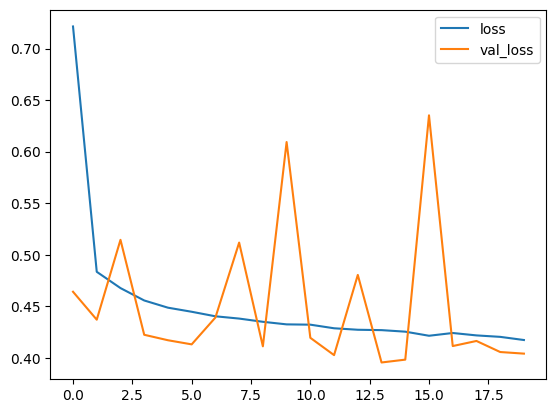

In [36]:
pd.DataFrame(history.history).plot()